## Python Exercise : Model Evaluation 1

1. Analyze data 'bankloan.csv'
    - Employ, debtinc, credebt, othdebt as Features
    - Default as Target
2. Random state 2020, splitting 80:20 stratified
3. Modeling compute accuracy, recall and another metrics using Stratified CV 5 fold:
    - Logistic regression (solver liblinear)
    - KNN (k=5)
    - Tree (criterion entropy, max_depth 5)
4. Compute recall, precision, f1 score and make ROC, PRC from logistic regression (solver liblinear) in test
5. Simple Hyperparameter tuning : (optimize c) optimize by f1 and using training 60% validation 20% test 20%
6. Compare the result (before and after)
7. Grid Search CV hyperparameter tuning : (optimize C and max_iter) optimized by f1 and using stratified CV 5 fold
8. Compare the result

In [1]:
import pandas as pd
import numpy as np

# preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
import category_encoders as ce

# model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metrics for evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
import warnings

# visual
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# visualisasi hasil
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

In [2]:
raw = pd.read_csv('data/bankloan.csv')
bank_loan = raw.copy()
bank_loan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


### Data Splitting

In [3]:
x = bank_loan[['employ','debtinc','creddebt','othdebt']]
y = bank_loan['default']

x_trainval, x_test, y_trainval, y_test = train_test_split(
    x,
    y,
    stratify=y, # menjaga agar proporsi default pd train maupun test sama
    test_size=0.2,
    random_state=2020
)

### Modeling Benchmark

In [4]:
logreg = LogisticRegression(solver ='liblinear', random_state=2020) # define randomestate agar memastikan bahwa hasil perbandingan bukan kebetulan tp karena modelnya.
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2020)


#### Hitung metrics dengan 5 fold strat. cross validasi

In [5]:
skfold = StratifiedKFold(n_splits=4)

logreg_cv = cross_val_score(logreg, x_trainval, y_trainval, cv=skfold)
knn_cv = cross_val_score(knn, x_trainval,y_trainval, cv=skfold)
tree_cv = cross_val_score(tree, x_trainval, y_trainval, cv=skfold)

df_cv = pd.DataFrame({
    'logreg':logreg_cv,
    'knn':knn_cv,
    'tree':tree_cv
})
df_cv.describe()

,logreg,knn,tree
count,4.000000,4.000000,4.000000
mean,0.803571,0.764286,0.762500
std,0.017976,0.027355,0.029378
min,0.778571,0.742857,0.735714
25%,0.800000,0.742857,0.741071
50%,0.807143,0.757143,0.757143
75%,0.810714,0.778571,0.778571
max,0.821429,0.800000,0.800000


In [6]:
def model_evaluation(model, metrics):
    skfold = StratifiedKFold(n_splits=4)
    
    model_cv = cross_val_score(model,x_trainval, y_trainval, cv=skfold, scoring = metrics)
    print(
        '''hasil cross validation : {}\nrata-rata score validasi: {}\nstandar deviasi : {}\n'''.format(model_cv, model_cv.mean(),model_cv.std()))


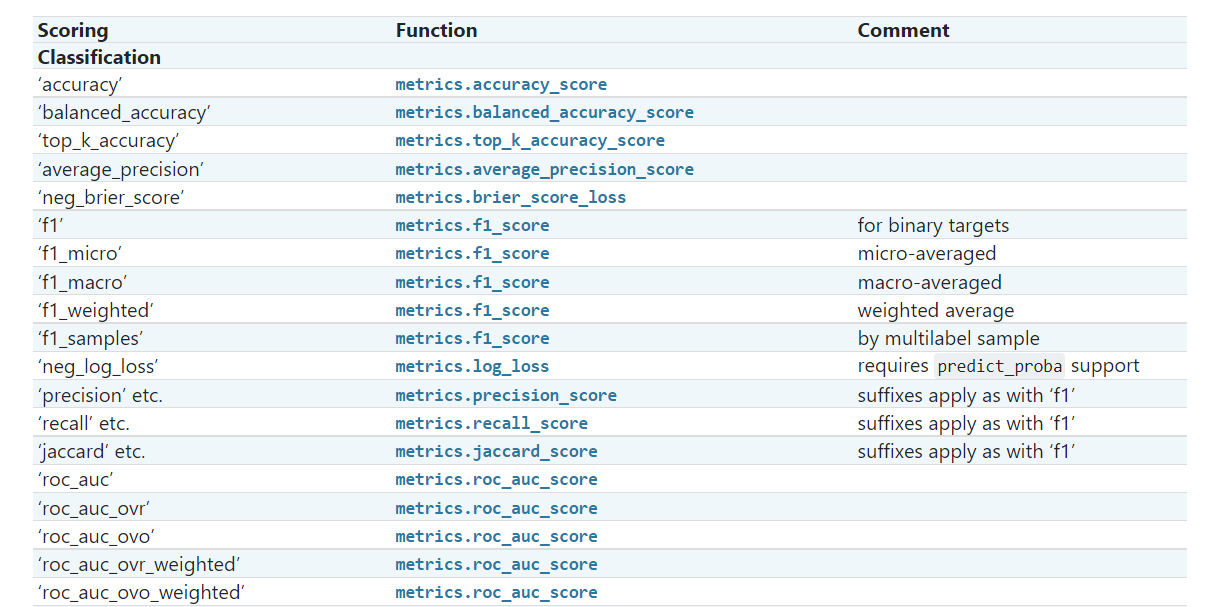

In [7]:
print(model_evaluation(logreg,'f1'),model_evaluation(knn,'f1'),model_evaluation(tree,'f1'))

hasil cross validation : [0.57142857 0.56140351 0.57142857 0.52307692]
rata-rata score validasi: 0.5568343936764989
standar deviasi : 0.019914967251760077

hasil cross validation : [0.47058824 0.53333333 0.38461538 0.4       ]
rata-rata score validasi: 0.44713423831070886
standar deviasi : 0.059394059984406784

hasil cross validation : [0.41269841 0.5        0.51515152 0.4375    ]
rata-rata score validasi: 0.46633748196248204
standar deviasi : 0.04249919138718511

None None None


In [8]:
print(model_evaluation(logreg,'roc_auc'),model_evaluation(knn,'roc_auc'),model_evaluation(tree,'roc_auc'))

hasil cross validation : [0.84885857 0.83363946 0.83092949 0.81490385]
rata-rata score validasi: 0.8320828413364821
standar deviasi : 0.012044668523790316

hasil cross validation : [0.72054579 0.77171346 0.76201923 0.73584402]
rata-rata score validasi: 0.7475306243510127
standar deviasi : 0.020368403598962234

hasil cross validation : [0.75990554 0.77341905 0.74839744 0.71594551]
rata-rata score validasi: 0.7494168838601485
standar deviasi : 0.021257279781806294

None None None


In [9]:
model_evaluation(knn,'f1' )

hasil cross validation : [0.47058824 0.53333333 0.38461538 0.4       ]
rata-rata score validasi: 0.44713423831070886
standar deviasi : 0.059394059984406784



In [10]:
model_evaluation(tree,'f1' )

hasil cross validation : [0.41269841 0.5        0.51515152 0.4375    ]
rata-rata score validasi: 0.46633748196248204
standar deviasi : 0.04249919138718511



**Pemenangnya adalah Logistic Regression**

### Model Performance in Test

In [11]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_trainval, y_trainval)

LogisticRegression(solver='liblinear')

In [12]:
y_pred = logreg.predict(x_test)

In [13]:
# bandingan antar model
print('recall:',recall_score(y_test,y_pred)) # default 1
print('precision:',precision_score(y_test,y_pred)) # default 1
print('f1:',f1_score(y_test,y_pred)) # default 1
print('roc_auc:',roc_auc_score(y_test,y_pred))

recall: 0.4864864864864865
precision: 0.782608695652174
f1: 0.6000000000000001
roc_auc: 0.718971398583049


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



**yang dibaca yang 1**

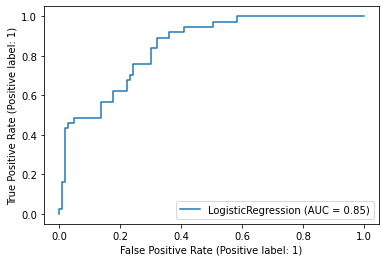

In [15]:
plot_roc_curve(logreg,x_test, y_test)

**Nilai AUC min 0.5 dan max 1, dibawah 0.5 sangat buruk**

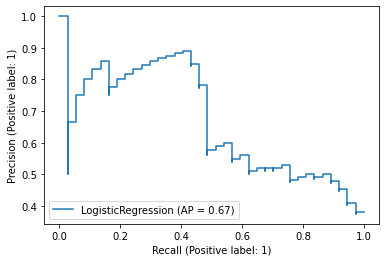

In [16]:
plot_precision_recall_curve(logreg, x_test,y_test)

**Nilai Average Precision = merangkum nilai yg ada hasilnya 0.67**

### Simple Hyperparameter Tuning for Logistic Regression

In [17]:
x_train, x_val, y_train, y_val = train_test_split(
    x_trainval,
    y_trainval,
    stratify=y_trainval,
    test_size=0.2, # nentuin 140 dari mana 
        random_state=2020 # random state
)

In [18]:
hyperparam_c = [1000,100,10,1,0.1,0.01,0.001,0.0001]
hyperparam_c_1 = [0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04]

best_score = 0
val_score = []

for i in hyperparam_c_1:
    # fitting model
    logreg = LogisticRegression(solver='liblinear', C=i)
    logreg.fit(x_train,y_train)
    
    # perhitungan score setiap i/hyperparam
    y_pred_val = logreg.predict(x_val)
    score_temp = f1_score(y_val, y_pred_val)
    
    # penentuan skor terbaik
    if score_temp > best_score:
        best_score = score_temp
        best_param = i


In [19]:
?LogisticRegression

In [20]:
print('skor terbaik', best_score)
print('param terbaik', best_param)

skor terbaik 0.6557377049180328
param terbaik 0.01


### Perbandingan sebelum dan setelah tunning

In [21]:
logreg_after = LogisticRegression(solver='liblinear', C=0.1)
logreg_before = LogisticRegression(solver='liblinear', C=1)

In [22]:
logreg_before.fit(x_trainval,y_trainval)
y_pred = logreg_before.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [23]:
logreg_after.fit(x_trainval,y_trainval)
y_pred = logreg_after.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       103
           1       0.72      0.49      0.58        37

    accuracy                           0.81       140
   macro avg       0.78      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



1. Improvement pada validation score belum significant
2. Pemilihan c kurang baik
3. Bisa jadi test set kebetulan sulit diprediksi

**pembagain data train - val - test ketika datanya sangat besar (jutaan)**

### Hyperparam tuning for Logistic Regression with Grid Search (Cross Validation)

In [24]:
hyperparam_space = {
    'C': [1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005],
    'max_iter': [100,200,300,400,500,1000],
    'penalty': ['l1', 'l2', 'elasticnet']
}

skfold = StratifiedKFold(n_splits=5) # setiap splits memiliki proporsi default yg sama
logreg = LogisticRegression(solver='liblinear', random_state=2020)

grid_search = GridSearchCV(
    logreg,
    param_grid = hyperparam_space,
    cv = skfold,
    scoring = 'f1',
    n_jobs=-1 # hal yg didefine utk memperepat process
)


In [25]:
grid_search.fit(x_trainval, y_trainval)

C:\Users\62812\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.55752958 0.5552067         nan 0.55752958 0.5552067         nan
 0.55752958 0.5552067         nan 0.55752958 0.5552067         nan
 0.55752958 0.5552067         nan 0.55752958 0.5552067         nan
 0.55752958 0.5552067         nan 0.55752958 0.5552067         nan
 0.55752958 0.5552067         nan 0.55752958 0.5552067         nan
 0.55752958 0.5552067         nan 0.55752958 0.5552067         nan
 0.55752958 0.5552067         nan 0.55752958 0.5552067         nan
 0.55752958 0.5552067         nan 0.55752958 0.5552067         nan
 0.55752958 0.5552067         nan 0.55752958 0.5552067         nan
 0.5552067  0.5552067         nan 0.5552067  0.5552067         nan
 0.5552067  0.5552067         nan 0.5552067  0.5552067         nan
 0.5552067  0.5552067         nan 0.5552067  0.5552067         nan
 0.5552067  0.5552067         nan 0.5552067  0.555206

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=2020,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001, 5e-05],
                         'max_iter': [100, 200, 300, 400, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1')

In [26]:
grid_search.best_params_

{'C': 1000, 'max_iter': 100, 'penalty': 'l1'}

In [27]:
grid_search.best_score_

0.5575295784355018

In [28]:
hasil_cv = pd.DataFrame(grid_search.cv_results_)
hasil_cv.sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044084,0.003285,0.004684,0.001261,1000,100,l1,"{'C': 1000, 'max_iter': 100, 'penalty': 'l1'}",0.576923,0.487805,0.653846,0.530612,0.538462,0.55753,0.055862,1
18,0.009756,0.003328,0.007100,0.003965,500,100,l1,"{'C': 500, 'max_iter': 100, 'penalty': 'l1'}",0.576923,0.487805,0.653846,0.530612,0.538462,0.55753,0.055862,1
51,0.005455,0.000496,0.004165,0.000251,100,1000,l1,"{'C': 100, 'max_iter': 1000, 'penalty': 'l1'}",0.576923,0.487805,0.653846,0.530612,0.538462,0.55753,0.055862,1
48,0.005385,0.000122,0.003894,0.000429,100,500,l1,"{'C': 100, 'max_iter': 500, 'penalty': 'l1'}",0.576923,0.487805,0.653846,0.530612,0.538462,0.55753,0.055862,1
45,0.007564,0.004788,0.004469,0.001177,100,400,l1,"{'C': 100, 'max_iter': 400, 'penalty': 'l1'}",0.576923,0.487805,0.653846,0.530612,0.538462,0.55753,0.055862,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.000599,0.000489,0.000000,0.000000,0.00005,200,elasticnet,"{'C': 5e-05, 'max_iter': 200, 'penalty': 'elas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,201
278,0.000410,0.000503,0.000000,0.000000,0.00005,300,elasticnet,"{'C': 5e-05, 'max_iter': 300, 'penalty': 'elas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,208
281,0.000400,0.000490,0.000000,0.000000,0.00005,400,elasticnet,"{'C': 5e-05, 'max_iter': 400, 'penalty': 'elas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,202
284,0.001034,0.000928,0.000000,0.000000,0.00005,500,elasticnet,"{'C': 5e-05, 'max_iter': 500, 'penalty': 'elas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,193


In [29]:
hasil_cv[(hasil_cv['param_C']==1) & (hasil_cv['param_max_iter']==100)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
108,0.006176,0.002038,0.003803,0.000593,1,100,l1,"{'C': 1, 'max_iter': 100, 'penalty': 'l1'}",0.566038,0.439024,0.653846,0.530612,0.528302,0.543564,0.069277,97
109,0.004707,0.000371,0.004029,0.000044,1,100,l2,"{'C': 1, 'max_iter': 100, 'penalty': 'l2'}",0.566038,0.439024,0.653846,0.530612,0.528302,0.543564,0.069277,97
110,0.001536,0.000639,0.000000,0.000000,1,100,elasticnet,"{'C': 1, 'max_iter': 100, 'penalty': 'elasticn...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,272


In [30]:
hasil_cv[(hasil_cv['param_C']==0.05) & (hasil_cv['param_max_iter']==100)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
162,0.005427,0.000422,0.003706,0.000592,0.05,100,l1,"{'C': 0.05, 'max_iter': 100, 'penalty': 'l1'}",0.415094,0.627451,0.551724,0.52,0.500000,0.522854,0.069162,121
163,0.006494,0.002806,0.005611,0.003401,0.05,100,l2,"{'C': 0.05, 'max_iter': 100, 'penalty': 'l2'}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,19
164,0.000983,0.000692,0.000000,0.000000,0.05,100,elasticnet,"{'C': 0.05, 'max_iter': 100, 'penalty': 'elast...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,269


**yang dilihat mean_test_score**

### Perbandingan setelah dan sebelum

In [31]:
logreg_after = LogisticRegression(solver='liblinear', C=0.05)
logreg_before = LogisticRegression(solver='liblinear', C=1)

In [32]:
logreg_before.fit(x_trainval,y_trainval)
y_pred = logreg_before.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [33]:
grid_search.best_estimator_.fit(x_trainval,y_trainval)
y_pred = grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.77      0.46      0.58        37

    accuracy                           0.82       140
   macro avg       0.80      0.71      0.73       140
weighted avg       0.82      0.82      0.80       140



In [34]:
logreg_after.fit(x_trainval,y_trainval)
y_pred = logreg_after.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



1. Improvement pada validation score belum significant
2. Pemilihan hyperparam kurang baik
3. bisa jadi test set kebetulan sulit dipredict

## Python Exercise : Model Evaluation 2

1. Analyze data from seaborn
    - Total Bill, sex, smoker, day, and time as Features
    - Tips as Target
2. Preprocess:
    - One hot encoding : smoker, day, time
    - No treatment : numerical
3. Random state 2020, splitting 80:20
    - Model linear regression and tree (criterion mse, max_depth 5) compute R2 using 5-flod CV
    - Model decision tree (criterion mse, max_depth 5) compute mse in test set
    - Do hyperparameter tuning (Randomized search) for decision tree (optimize criterion, min sample leaf, max depth) optimized by mse and using CV 5 fold
    - Compare the result (before and after) in data set

In [35]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pylab as plt

from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [36]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### EDA

In [37]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [38]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

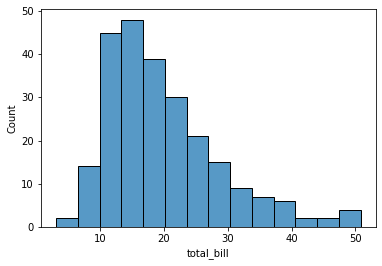

In [39]:
sns.histplot(tips['total_bill'])

### Preprocess

In [40]:
onehot = OneHotEncoder(drop='first')

# transformer = ColumnTransformer([
#     ('onehot',onehot, ['smoker','day','time','sex'])
# ])

# tips_enc=pd.DataFrame(transformer.fit_transform(tips))
# tips_enc.columns = transformer.get_feature_names()

# tips = pd.concat([tips_enc,tips['total_bill']], axis=1)
# tips = tips[['total_bill','onehot__x3_Male','onehot__x0_Yes','onehot__x1_Sat','onehot__x1_Sun','onehot__x1_Thur','onehot__x2_Lunch']]
# tips

x = tips[['total_bill','sex','smoker','day','time']]
y = tips['tip']

x = pd.get_dummies(x,drop_first=True)
x


,total_bill,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1,1,0,0,1,1
1,10.34,0,1,0,0,1,1
2,21.01,0,1,0,0,1,1
3,23.68,0,1,0,0,1,1
4,24.59,1,1,0,0,1,1
...,...,...,...,...,...,...,...
239,29.03,0,1,0,1,0,1
240,27.18,1,0,0,1,0,1
241,22.67,0,0,0,1,0,1
242,17.82,0,1,0,1,0,1


In [41]:
x_train,x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state= 2020
)

### Model Benchmark

In [42]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=2020)
linreg = LinearRegression()

In [43]:
from sklearn.metrics import SCORERS

In [44]:
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'top_k_accuracy': make_scorer(top_k_accuracy_score, ne

In [45]:
tree_cv = cross_val_score(tree, x_train, y_train,scoring='r2')
tree_cv.mean()

0.27497160666626597

In [46]:
print("tree: {}\ntree mean: {}\ntree std: {}".format(tree_cv,tree_cv.mean(),tree_cv.std()))

tree: [0.11865437 0.09663697 0.13388799 0.60844872 0.41722998]
tree mean: 0.27497160666626597
tree std: 0.2037583555823742


In [47]:
linreg_cv = cross_val_score(linreg, x_train, y_train,scoring='r2')

In [48]:
print("linreg: {}\nlinreg mean: {}\nlinreg std: {}".format(linreg_cv,linreg_cv.mean(),linreg_cv.std()))

linreg: [0.27243371 0.18984475 0.31816682 0.46456813 0.44769515]
linreg mean: 0.3385417115393333
linreg std: 0.10458807015801648


### Tree Test Score

In [49]:
tree = DecisionTreeRegressor(criterion='mse',max_depth=5, random_state=2020)
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=2020)

In [50]:
y_pred = tree.predict(x_test)
mean_squared_error(y_test,y_pred)

1.1723927020084088

### Hyperparameter tuning

In [51]:
x_train.shape

(195, 7)

In [52]:
hyperparam = {
    'min_samples_leaf':[10,15,20,50,100], # 6
    'max_depth':[2,3], # 6
    'criterion':['mse','mae'] # 6
}

# 72 combination = 6*6*2
# pilih 20 dari 72

# tree classification : entropy & gini
# tree regresion : mse, mae

tree = DecisionTreeRegressor(criterion='mse',max_depth=5, random_state=2020)

randomized_search = RandomizedSearchCV(
    tree,
    param_distributions=hyperparam,
    n_iter = 16,
    cv = 5,
    scoring='r2',
    random_state = 2020,
    n_jobs = -1
)

In [53]:
randomized_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=5,
                                                   random_state=2020),
                   n_iter=16, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 3],
                                        'min_samples_leaf': [10, 15, 20, 50,
                                                             100]},
                   random_state=2020, scoring='r2')

In [54]:
randomized_search.best_score_

0.3388908276040284

In [55]:
randomized_search.best_params_

{'min_samples_leaf': 10, 'max_depth': 3, 'criterion': 'mae'}

In [56]:
hasil_cv = pd.DataFrame(randomized_search.cv_results_)
hasil_cv[hasil_cv['param_min_samples_leaf']==10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.004462,0.000312,0.003611,0.000711,10,3,mse,"{'min_samples_leaf': 10, 'max_depth': 3, 'crit...",0.257945,0.250398,0.191597,0.257447,0.371851,0.265848,0.058517,5
8,0.005031,0.000812,0.002338,0.000231,10,3,mae,"{'min_samples_leaf': 10, 'max_depth': 3, 'crit...",0.324780,0.345004,0.274197,0.243595,0.506879,0.338891,0.091349,1
9,0.005696,0.001064,0.003053,0.000868,10,2,mae,"{'min_samples_leaf': 10, 'max_depth': 2, 'crit...",0.364312,-0.049042,0.231098,0.359619,0.331705,0.247539,0.155893,8


### Perbandingan sebelum dan sesudah

In [57]:
tree_after = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=2020)
tree_before = DecisionTreeRegressor(criterion='mae', max_depth=3, min_samples_leaf=10, random_state=2020)
linreg = LinearRegression()

In [58]:
tree_before.fit(x_train,y_train)
y_pred = tree_before.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.2082561224489798
0.4395033250463173


In [59]:
tree_after.fit(x_train,y_train)
y_pred = tree_after.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.1723927020084088
0.456139969823803


In [60]:
linreg.fit(x_train,y_train)
y_pred = linreg.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.3375316267761348
0.379533845908511
